In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
col_names = ['timestamp', 'acade-year', 'label', 'scale', 'gender', 'age', 'where', 'status', 'finan', 'copeup', 'fam', 'pressure', 'result', 'livingplace', 'support', 'smedia', 'infer', 'meal', 'sick', 'hobby', 'sleep']
# load dataset
depression = pd.read_csv("depression_dataset.csv",names=col_names)

In [ ]:
depression.drop([0], axis=0, inplace=True)
depression.drop(['timestamp'], axis=1, inplace=True)
# depression.head()

In [ ]:
dataset_encoded=depression.iloc[:,0:20]

le=LabelEncoder()

for i in dataset_encoded:
    dataset_encoded[i]=le.fit_transform(dataset_encoded[i])

dataset_encoded.head()

,acade-year,label,scale,gender,age,where,status,finan,copeup,fam,pressure,result,livingplace,support,smedia,infer,meal,sick,hobby,sleep
1,3,2,27,0,3,2,0,1,2,0,1,0,1,0,2,3,2,0,0,4
2,3,1,31,0,3,2,0,1,2,1,1,0,1,0,0,1,2,1,0,2
3,1,0,6,0,3,2,0,1,1,1,1,0,0,2,2,3,2,1,1,2
4,2,0,6,0,3,2,0,1,0,0,1,2,0,0,2,3,2,1,1,2
5,0,2,16,0,3,2,0,1,2,0,1,0,1,2,2,3,2,1,1,2


In [ ]:
feature_cols = ['acade-year', 'scale', 'gender', 'age', 'where', 'status', 'finan', 'copeup', 'fam', 'pressure', 'result', 'livingplace', 'support', 'smedia', 'infer', 'meal', 'sick', 'hobby', 'sleep']
X = dataset_encoded[feature_cols] # Features
y = dataset_encoded.label # Target variable

In [ ]:
one_hot = pd.get_dummies(y)

In [ ]:
one_hot.shape

(1007, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(805, 19)

In [ ]:
y_train.shape

(805, 5)

In [ ]:
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
model = Sequential()

model.add(Dense(16, input_dim=19, activation="relu"))

model.add(Dense(16,  activation="relu"))
model.add(Dense(16,  activation="relu"))
model.add(Dense(16,  activation="relu"))

model.add(Dense(5, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 85        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_result = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 1.9483 - accuracy: 0.2438 - val_loss: 1.5629 - val_accuracy: 0.2236
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1.4019 - accuracy: 0.2748 - val_loss: 1.2634 - val_accuracy: 0.5404
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 1.1484 - accuracy: 0.4255 - val_loss: 1.1188 - val_accuracy: 0.5342
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.6475 - val_loss: 1.0094 - val_accuracy: 0.6584
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.7252 - val_loss: 0.9033 - val_accuracy: 0.8571
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7563 - accuracy: 0.7950 - val_loss: 0.7770 - val_accuracy: 0.8261
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.8339 - val_loss: 0.6496 - val_accuracy: 0.8137
Epoch 8/100


In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9307
Test set
  Loss: 0.243
  Accuracy: 0.931


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred.shape

(202,)

In [ ]:
y=np.array(y_test)
y=np.argmax(y, axis=1)
y.shape

(202,)

In [ ]:
target_names=['Very Bad','Bad','Normal','Good','Very Good']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      0.86      0.93        29
         Bad       0.90      0.92      0.91        62
      Normal       0.94      0.98      0.96        65
        Good       0.83      0.91      0.87        11
   Very Good       0.94      0.91      0.93        35

    accuracy                           0.93       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.93      0.93      0.93       202



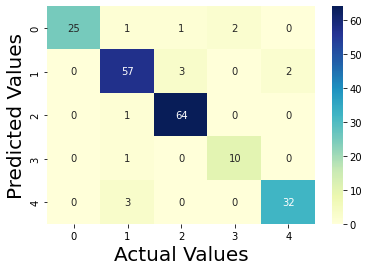

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.show();